# Nursery Scenario

Number of Omega-automaton states (including the trap state): 4
Number of accepting pairs: 4


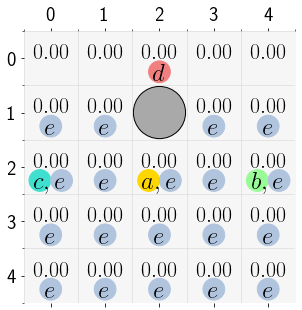

In [116]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np
import pickle


# LTL Specification
ltl = 'FGe & GFc & GFb & Fa & G(a->X(G!a)) & G!d'

oa = OmegaAutomaton(ltl,oa_type='dpa')
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
print('Number of accepting pairs:',oa.shape[0])
display(oa)

# MDP Description
shape = (5,5)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['E',  'E',  'E',  'E',  'E'],
['E',  'E',  'B',  'E',  'E'],
['E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E']
])

# Labels of the states
label = np.array([
[(),        (),        ('d',),    (),        ()],
[('e',),    ('e',),    (),        ('e',),    ('e',)],
[('c','e'), ('e',),    ('a','e'), ('e',),    ('b','e',)],
[('e',),    ('e',),    ('e',),    ('e',),    ('e',)],
[('e',),    ('e',),    ('e',),    ('e',),    ('e',)]
],dtype=np.object)

# Colors of the labels
lcmap={
    'a':'gold',
    'b':'palegreen',
    'c':'turquoise',
    'd':'lightcoral',
    'e':'lightsteelblue',
}
reward = np.zeros(shape)

grid_mdp = GridMDP(shape=shape,structure=structure,reward=reward,label=label,figsize=5,robust=True,lcmap=lcmap)  # Use figsize=4 for smaller figures
grid_mdp.plot()
# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

In [25]:
Q=csrl.minimax_q(T=2**13,K=2**20,start=(4,3))

In [154]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from ipywidgets.widgets import IntSlider
from ipywidgets import interact
# Q=csrl.shapley(T=2**10)
Q = np.load('nursery_Q.npy')
with open('nursery_csrl.pkl','rb') as f:
    csrl = pickle.load(f)
policy = np.argmax(np.min(Q,axis=-1),axis=-1)
policy_ = np.take_along_axis(np.argmin(Q,axis=-1),np.expand_dims(policy,axis=-1),axis=-1).reshape(policy.shape)
value = np.max(np.min(Q,axis=-1),axis=-1)
episode=csrl.simulate(policy,policy_,value=value,start=(0,0),T=1000)

interactive(children=(IntSlider(value=0, description='t', max=999), Output()), _dom_classes=('widget-interact'…

In [132]:
np.max(Q)

0.18452307892044476

In [155]:
import matplotlib.pyplot as plt
from ipywidgets.widgets import IntSlider
from ipywidgets import interact
    
self = csrl
T=1000
start=(0,0)
e = 1-self.discount
e_ = np.sqrt(e)

state = (0,self.oa.q0)+(start if start else self.mdp.random_state())
episode = [state]
for t in range(T):
    a1 = policy[state]
    a2 = policy_[state]

    states, probs = self.transition_probs[state][a1][a2]
    next_state = states[np.random.choice(len(states),p=probs)]

    state = (0,)+next_state[1:]

    episode.append(state)


def plot_agent(t):
    val = value[episode[t][:2]] if value is not None else None
    self.mdp.plot(value=val,policy=policy[episode[t][:2]],policy_=policy_[episode[t][:2]],agent=episode[t][2:])
t=IntSlider(value=0,min=0,max=T-1)
interact(plot_agent,t=t)


interactive(children=(IntSlider(value=0, description='t', max=999), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_agent(t)>

In [29]:
Q[0, 7, 4, 3]

array([[8.11159046e+136, 8.11159046e+136, 8.11159046e+136,
        8.11159046e+136],
       [9.01287829e+136, 8.11159046e+136, 8.11159046e+136,
        8.11159046e+136],
       [8.11159046e+136, 9.01287829e+136, 8.11159046e+136,
        8.11159046e+136],
       [8.11159046e+136, 8.11159046e+136, 9.01287829e+136,
        9.01287829e+136]])

In [5]:
episode=csrl.simulate(policy,start=(4,1),T=1000,plot=False)
elements, counts = np.unique(np.array(episode)[:,1], return_counts=True)
sorted(zip(elements,counts),key=lambda x:-x[1])

[(41, 476),
 (2, 306),
 (9, 62),
 (18, 55),
 (1, 54),
 (12, 31),
 (11, 7),
 (13, 6),
 (8, 3),
 (0, 1)]

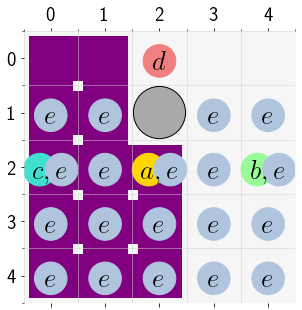

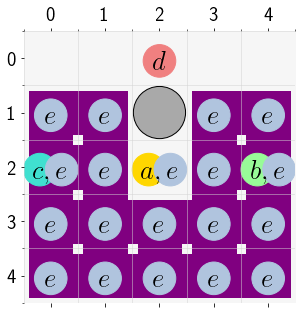

In [182]:
# Plot the important parts of the policy

policy=np.argmax(Q,axis=4)

hidden = list(zip(*np.where(csrl.mdp.structure == 'E')))
path = {
    (0,0) : 'dr',
    (1,0) : 'udr',
    (2,0) : 'udr',
    (3,0) : 'udr',
    (4,0) : 'ur',
    (0,1) : 'ld',
    (1,1) : 'lud',
    (2,1) : 'ludr',
    (3,1) : 'ludr',
    (4,1) : 'lur',
    (2,2) : 'ld',
    (3,2) : 'lud',
    (4,2) : 'lu'
}
csrl.plot(np.zeros(value.shape),policy,iq=(0,0),save='nursery_dpa_0a.pdf',path=path,hidden=hidden)

hidden = list(zip(*np.where(csrl.mdp.structure == 'E')))
path = {
    (1,0) : 'dr',
    (1,1) : 'ld',
    (2,0) : 'udr',
    (3,0) : 'udr',
    (4,0) : 'ur',
    (2,1) : 'lud',
    (3,1) : 'ludr',
    (4,1) : 'lur',
    (3,2) : 'ldr',
    (4,2) : 'lur',
    (1,3) : 'dr',
    (2,3) : 'udr',
    (3,3) : 'ludr',
    (4,3) : 'lur',
    (1,4) : 'ld',
    (2,4) : 'lud',
    (3,4) : 'lud',
    (4,4) : 'lu'
}
csrl.plot(np.zeros(value.shape),policy,iq=(0,0),save='nursery_dpa_bc.pdf',path=path,hidden=hidden)


In [181]:
# Save the animation
# episode=csrl.simulate(policy,start=(4,1),T=200, animation='test')
csrl.oa.shape

(4, 4)